# Cumulative Control Data


In [ ]:
"""
Key Definition's

Control Market | A geographic region in which there are no advertisments on the population
Exposed Market | A geographic region in which there digital advertisments exposing a population to a specific message
Departure City | A City in which people are intending to begin their travel from
"""

In [1]:
#This section has a focus on the analysis of the search data as a whole before being broken down by City.

In [3]:
#Importing Lib's
import pandas as pd                                      #General Data Manipulation
from prophet import Prophet                              #Facebook Model
from statsmodels.tsa.seasonal import seasonal_decompose  #Breakdown of Data
import matplotlib.pyplot as plt                          #Visulization
import numpy as np                                       #General Data Manipulation

In [4]:
# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [5]:
#Calling Control data file from local storage
file = './files/Control_Data.xlsx'

In [6]:
#Instatiating a Data Frame from the file
df = pd.read_excel(io = file,
             sheet_name = 0,
             header = 0)

#looking at the first 6 lines of the data that was imported
#ds = Date , Y = Search Volume

print(f"{df.head(6)}")

         ds     y Control
0  2022-Jan  1258  Denver
1  2022-Feb  1284  Denver
2  2022-Mar  1622  Denver
3  2022-Apr  1667  Denver
4  2022-May  2128  Denver
5  2022-Jun  2193  Denver


In [7]:
#Instantiating the model 
model_p = Prophet(growth = 'linear')

#Ensures dates are specific Data Type
df['ds'] = pd.to_datetime(df['ds'], format='%Y-%b')

#Fitting the model
model_complete = model_p.fit(df)

15:30:26 - cmdstanpy - INFO - Chain [1] start processing
15:30:26 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
#exptrapoaltes the data using future Monthly intervals
future = model_complete.make_future_dataframe(periods=12, freq= 'ME')

#Observing the tail of the future dates
print(future.tail(4))

           ds
35 2024-11-30
36 2024-12-31
37 2025-01-31
38 2025-02-28


In [11]:
#forecasting the data , shows values & upper/lower bounds
forecast = model_p.predict(future)

#Rounding the calculation
forecast = round(forecast,2)

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

           ds    yhat  yhat_lower  yhat_upper
29 2024-05-31  703.61      -88.14     1494.28
30 2024-06-30  690.64     -100.47     1435.26
31 2024-07-31  620.81     -146.46     1377.88
32 2024-08-31  559.98     -240.48     1285.98
33 2024-09-30  590.29     -210.75     1381.12
34 2024-10-31  542.22     -270.50     1291.29
35 2024-11-30  588.11     -192.25     1384.75
36 2024-12-31  656.84     -133.79     1488.23
37 2025-01-31  623.85     -156.32     1404.81
38 2025-02-28  657.19     -178.43     1446.91


C:\Users\Jack.Barish\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Jack.Barish\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\Jack.Barish\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python date

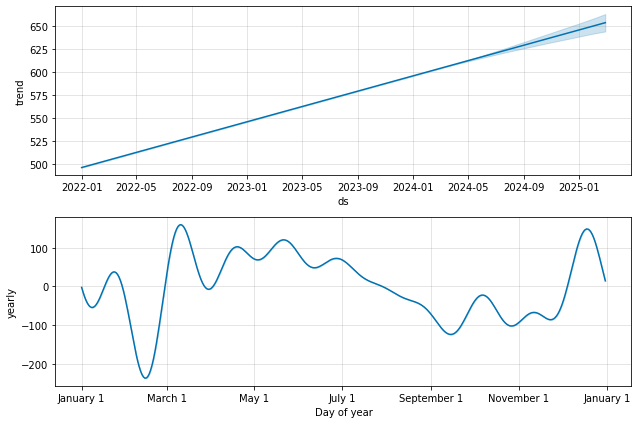

In [12]:
#plotting the trend and seasonality of the data
fig1 = model_p.plot_components(forecast)

C:\Users\Jack.Barish\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Jack.Barish\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


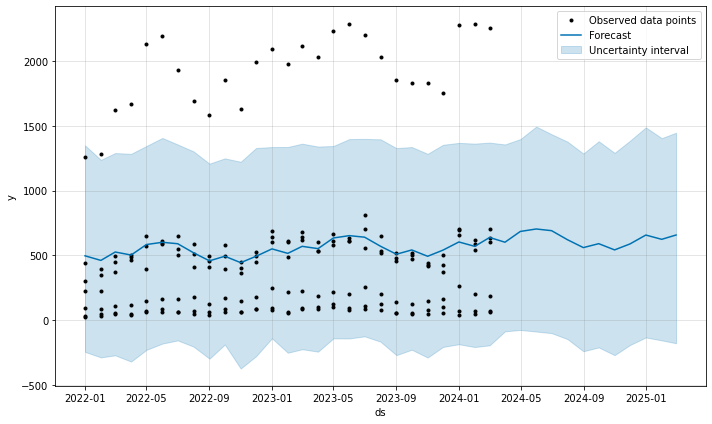

In [13]:
#plots observed + forecasted data
fig2 = model_p.plot(forecast, 
                  include_legend='TRUE',
                  plot_cap='TRUE')

# Control Markets| Non-Cummulative


In [14]:
#This section has a focus on only the Control Markets
#Analisys to focus on one city at a time

In [15]:
#Calling data file from local storage - Denver
Denver = './files/Control_Data/Denver.xlsx'
#Calling data file from local storage - Fresno
Fresno = './files/Control_Data/Fresno.xlsx'
#Calling data file from local storage - Kansas City
Kansas = './files/Control_Data/kansas.xlsx'
#Calling data file from local storage - Memphis
Memphis = './files/Control_Data/memphis.xlsx'
#Calling data file from local storage -  Nashville
Nashville = './files/Control_Data/nashville.xlsx'
#Calling data file from local storage - Salt Lake City
Salt = './files/Control_Data/saltlakecity.xlsx'
#Calling data file from local storage - Portland
Portland = './files/Control_Data/Portland.xlsx'

In [16]:
#Instatiating a Data Frame from the file for each city
df_Denver = pd.read_excel(io = Denver,
             sheet_name = 0,
             header = 0)

df_Fresno = pd.read_excel(io = Fresno,
             sheet_name = 0,
             header = 0)

df_Kansas = pd.read_excel(io = Kansas,
             sheet_name = 0,
             header = 0)

df_Memphis = pd.read_excel(io = Memphis,
             sheet_name = 0,
             header = 0)

df_Nashville = pd.read_excel(io = Nashville,
             sheet_name = 0,
             header = 0)


df_Salt = pd.read_excel(io = Salt,
             sheet_name = 0,
             header = 0)

df_Portland = pd.read_excel(io = Portland,
             sheet_name = 0,
             header = 0)

In [17]:
#Checking each DF
print(f""" {df_Portland.head(3)}\n\n 
      {df_Denver.head(3)}\n\n{df_Fresno.head(3)}\n\n
      {df_Kansas.head(3)}\n\n{df_Memphis.head(3)}\n\n
      {df_Nashville.head(3)}\n\n{df_Salt.head(3)}""")
    


          ds    y      city
0  2022-Jan  299  Portland
1  2022-Feb  392  Portland
2  2022-Mar  452  Portland

 
               ds     y Control
0  2022-Jan  1258  Denver
1  2022-Feb  1284  Denver
2  2022-Mar  1622  Denver

         ds   y    city
0  2022-Jan  23  Fresno
1  2022-Feb  44  Fresno
2  2022-Mar  57  Fresno


               ds    y         city
0  2022-Jan   97  Kansas City
1  2022-Feb   89  Kansas City
2  2022-Mar  107  Kansas City

         ds   y     city
0  2022-Jan  31  Memphis
1  2022-Feb  28  Memphis
2  2022-Mar  44  Memphis


               ds    y       city
0  2022-Jan  223  Nashville
1  2022-Feb  225  Nashville
2  2022-Mar  374  Nashville

         ds    y            city
0  2022-Jan  441  Salt Lake City
1  2022-Feb  350  Salt Lake City
2  2022-Mar  494  Salt Lake City


In [18]:

#Instantiating the model 
model_denver = Prophet(growth = 'linear')

#Ensures dates are specific Data Type
df_Denver['ds'] = pd.to_datetime(df_Denver['ds'], format='%Y-%b')

#Fitting the model
model_complete_denver = model_denver.fit(df_Denver)



#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Instantiating the model 
model_fresno = Prophet(growth = 'linear')

#Ensures dates are specific Data Type
df_Fresno['ds'] = pd.to_datetime(df_Fresno['ds'], format='%Y-%b')

#Fitting the model
model_complete_fresno = model_fresno.fit(df_Fresno)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


#Instantiating the model 
model_kansas = Prophet(growth = 'linear')

#Ensures dates are specific Data Type
df_Kansas['ds'] = pd.to_datetime(df_Kansas['ds'], format='%Y-%b')

#Fitting the model
model_complete_kansas = model_kansas.fit(df_Kansas)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


#Instantiating the model 
model_memphis = Prophet(growth = 'linear')

#Ensures dates are specific Data Type
df_Memphis['ds'] = pd.to_datetime(df_Memphis['ds'], format='%Y-%b')

#Fitting the model
model_complete_memphis = model_memphis.fit(df_Memphis)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


#Instantiating the model 
model_nashville = Prophet(growth = 'linear')

#Ensures dates are specific Data Type
df_Nashville['ds'] = pd.to_datetime(df_Nashville['ds'], format='%Y-%b')

#Fitting the model
model_complete_nashville = model_nashville.fit(df_Nashville)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


#Instantiating the model 
model_salt = Prophet(growth = 'linear')

#Ensures dates are specific Data Type
df_Salt['ds'] = pd.to_datetime(df_Salt['ds'], format='%Y-%b')

#Fitting the model
model_complete_salt = model_salt.fit(df_Salt)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#Instantiating the model 
model_portland = Prophet(growth = 'linear')

#Ensures dates are specific Data Type
df_Portland['ds'] = pd.to_datetime(df_Portland['ds'], format='%Y-%b')

#Fitting the model
model_complete_portland = model_portland.fit(df_Portland)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

15:38:40 - cmdstanpy - INFO - Chain [1] start processing
15:38:40 - cmdstanpy - INFO - Chain [1] done processing
15:38:40 - cmdstanpy - INFO - Chain [1] start processing
15:38:40 - cmdstanpy - INFO - Chain [1] done processing
15:38:41 - cmdstanpy - INFO - Chain [1] start processing
15:38:41 - cmdstanpy - INFO - Chain [1] done processing
15:38:41 - cmdstanpy - INFO - Chain [1] start processing
15:38:41 - cmdstanpy - INFO - Chain [1] done processing
15:38:41 - cmdstanpy - INFO - Chain [1] start processing
15:38:41 - cmdstanpy - INFO - Chain [1] done processing
15:38:41 - cmdstanpy - INFO - Chain [1] start processing
15:38:41 - cmdstanpy - INFO - Chain [1] done processing
15:38:42 - cmdstanpy - INFO - Chain [1] start processing
15:38:42 - cmdstanpy - INFO - Chain [1] done processing


In [19]:

#exptrapoaltes the data using future Monthly intervals
future_denver = model_denver.make_future_dataframe(periods=14, freq= 'ME')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#exptrapoaltes the data using future Monthly intervals
future_fresno = model_fresno.make_future_dataframe(periods=14, freq= 'ME')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#exptrapoaltes the data using future Monthly intervals
future_kansas = model_kansas.make_future_dataframe(periods=14, freq= 'ME')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#exptrapoaltes the data using future Monthly intervals
future_nashville = model_nashville.make_future_dataframe(periods=14, freq= 'ME')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#exptrapoaltes the data using future Monthly intervals
future_salt = model_salt.make_future_dataframe(periods=14, freq= 'ME')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#exptrapoaltes the data using future Monthly intervals
future_memphis = model_memphis.make_future_dataframe(periods=14, freq= 'ME')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#exptrapoaltes the data using future Monthly intervals
future_portland = model_portland.make_future_dataframe(periods=14, freq= 'ME')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  


In [20]:

#forecasting the data , shows values & upper/lower bounds
forecast_denver =round( model_denver.predict(future_denver),2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#forecasting the data , shows values & upper/lower bounds
forecast_fresno = round(model_fresno.predict(future_fresno),2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#forecasting the data , shows values & upper/lower bounds
forecast_nashville = round(model_nashville.predict(future_nashville),2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#forecasting the data , shows values & upper/lower bounds
forecast_salt = round(model_salt.predict(future_salt),2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#forecasting the data , shows values & upper/lower bounds
forecast_memphis = round(model_memphis.predict(future_memphis),2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#forecasting the data , shows values & upper/lower bounds
forecast_kansas = round(model_kansas.predict(future_kansas),2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#forecasting the data , shows values & upper/lower bounds
forecast_portland = round(model_portland.predict(future_portland),2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

print(f""" DENVER{forecast_denver[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(3)} \n
FRESNO{forecast_fresno[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)}\n
KANSAS{forecast_kansas[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)} \n
SALT LAKE CITY{forecast_salt[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)}\n
MEMPHIS{forecast_memphis[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)} \n
NASHVILLE{forecast_nashville[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)}\n
PORTLAND{forecast_portland[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)}



""")


 DENVER           ds     yhat  yhat_lower  yhat_upper
38 2025-02-28  2223.32     2072.13     2373.71
39 2025-03-31  2234.50     2061.71     2407.22
40 2025-04-30  2068.61     1874.90     2253.68 

FRESNO           ds    yhat  yhat_lower  yhat_upper
38 2025-02-28  132.32      110.16      152.55
39 2025-03-31  115.46       96.00      136.45
40 2025-04-30  139.01      118.22      160.02

KANSAS           ds    yhat  yhat_lower  yhat_upper
38 2025-02-28  329.41      302.53      359.25
39 2025-03-31  194.57      166.43      223.89
40 2025-04-30  257.06      227.81      287.91 

SALT LAKE CITY           ds    yhat  yhat_lower  yhat_upper
38 2025-02-28  710.32      649.73      771.62
39 2025-03-31  550.16      486.49      620.29
40 2025-04-30  784.91      720.47      851.83

MEMPHIS           ds   yhat  yhat_lower  yhat_upper
38 2025-02-28  97.66       90.71      105.93
39 2025-03-31  97.65       89.53      106.74
40 2025-04-30  94.40       85.49      104.25 

NASHVILLE           ds    yhat  

# Specific Period Prediction for Control Markets

In [21]:
#input for future month 
period = 30

#Sums all of the predicted values for the given period
cummulative_control =  [forecast_kansas['yhat'][period] + 
          forecast_denver['yhat'][period] +
         forecast_nashville['yhat'][period] +
         forecast_salt['yhat'][period] +
         forecast_fresno['yhat'][period] +
         forecast_portland['yhat'][period] +
         forecast_memphis['yhat'][period] ]

print(f"Cummulative Prediction for the {period}th period {forecast_memphis['ds'][period]} = {cummulative_control}")

Cummulative Prediction for the 30th period 2024-06-30 00:00:00 = [5441.11]


# Save + Export Data

In [22]:
#adding a city lable to each DF
forecast_denver['City'] = "Denver"
forecast_kansas['City'] = 'Kansas'
forecast_nashville['City'] = 'Nashville'
forecast_salt['City'] = 'Salt Lake City'
forecast_fresno['City'] = 'Fresno'
forecast_portland['City'] = 'Portland'
forecast_memphis['City'] = 'Memphis'

#Combining all city's into one DF
control_output = pd.concat((forecast_denver,forecast_kansas,
                            forecast_nashville,forecast_salt,forecast_fresno,
                            forecast_memphis,forecast_portland))

In [23]:
# determining the name of the file + Path of file for save
out_path = './files/Control_Data/Final_Output_Control_Data.xlsx'
 
# creating an ExcelWriter object
with pd.ExcelWriter( out_path) as writer:
    # writing to the desired file path
    control_output.to_excel(writer, sheet_name='Sheet1', index=False)
    print("File Saved")

File Saved


# Exposed Markets

In [24]:
#local path defined before specific file
path = './files/Exposed_Data/'

#Calling data file from local storage - using saved path

La = f'{path}LA.xlsx'
Dallas = f'{path}Dallas.xlsx'
Houston = f'{path}Houston.xlsx'
Sacramento = f'{path}Sacramento.xlsx'
Sandiego = f'{path}San Diego.xlsx'
Sanantonio = f'{path}San_Antonio.xlsx'
Sanfran = f'{path}San_Fran.xlsx'
Austin = f'{path}Austin.xlsx'


In [25]:
#Creating a DataFrame for each city

df_LA = pd.read_excel(io = La,
                 sheet_name = 0,
                 header = 0)

df_Dallas = pd.read_excel(io = Dallas,
             sheet_name = 0,
             header = 0)

df_Houston = pd.read_excel(io = Houston,
             sheet_name = 0,
             header = 0)

df_Sacramento = pd.read_excel(io = Sacramento,
             sheet_name = 0,
             header = 0)

df_Sandiego = pd.read_excel(io = Sandiego,
             sheet_name = 0,
             header = 0)

df_Sanantonio = pd.read_excel(io = Sanantonio,
             sheet_name = 0,
             header = 0)

df_Sanfran = pd.read_excel(io = Sanfran,
             sheet_name = 0,
             header = 0)

df_Austin = pd.read_excel(io = Austin,
             sheet_name = 0,
             header = 0)

In [26]:
#Instantiating the model 
model_La = Prophet(growth = 'linear')

df_LA['ds'] = df_LA['Date']

#Ensures dates are specific Data Type
df_LA['ds'] = pd.to_datetime(df_LA['ds'], format='%Y-%b')

#Fitting the model
model_complete_La = model_La.fit(df_LA)


future_La = model_La.make_future_dataframe(periods=14, freq= 'ME')



#forecasting the data , shows values & upper/lower bounds
forecast_La =round( model_La.predict(future_La),2)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



#Instantiating the model 
model_Austin = Prophet(growth = 'linear')

df_Austin['ds'] = df_Austin['Date']

#Ensures dates are specific Data Type
df_Austin['ds'] = pd.to_datetime(df_Austin['ds'], format='%Y-%b')


#Fitting the model
model_complete_Austin = model_Austin.fit(df_Austin)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Instantiating the model 
model_Dallas = Prophet(growth = 'linear')

df_Dallas['ds'] = df_Dallas['Date']

#Ensures dates are specific Data Type
df_Dallas['ds'] = pd.to_datetime(df_Dallas['ds'], format='%Y-%b')


#Fitting the model
model_complete_Dallas = model_Dallas.fit(df_Dallas)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Instantiating the model 
model_Houston = Prophet(growth = 'linear')

df_Houston['ds'] = df_Houston['Date']

#Ensures dates are specific Data Type
df_Houston['ds'] = pd.to_datetime(df_Houston['ds'], format='%Y-%b')


#Fitting the model
model_complete_Houston = model_Houston.fit(df_Houston)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Instantiating the model 
model_Sacramento = Prophet(growth = 'linear')

df_Sacramento['ds'] = df_Sacramento['Date']

#Ensures dates are specific Data Type
df_Sacramento['ds'] = pd.to_datetime(df_Sacramento['ds'], format='%Y-%b')


#Fitting the model
model_complete_Sacramento = model_Sacramento.fit(df_Sacramento)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Instantiating the model 
model_Sandiego = Prophet(growth = 'linear')

df_Sandiego['ds'] = df_Sandiego['Date']

#Ensures dates are specific Data Type
df_Sandiego['ds'] = pd.to_datetime(df_Sandiego['ds'], format='%Y-%b')


#Fitting the model
model_complete_Sandiego = model_Sandiego.fit(df_Sandiego)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Instantiating the model 
model_Sanantonio = Prophet(growth = 'linear')

df_Sanantonio['ds'] = df_Sanantonio['Date']

#Ensures dates are specific Data Type
df_Sanantonio['ds'] = pd.to_datetime(df_Sanantonio['ds'], format='%Y-%b')


#Fitting the model
model_complete_Sanantonio = model_Sanantonio.fit(df_Sanantonio)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#Instantiating the model 
model_Sanfran = Prophet(growth = 'linear')

df_Sanfran['ds'] = df_Sanfran['Date']

#Ensures dates are specific Data Type
df_Sanfran['ds'] = pd.to_datetime(df_Sanfran['ds'], format='%Y-%b')


#Fitting the model
model_complete_Sanfran = model_Sanfran.fit(df_Sanfran)

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


15:41:44 - cmdstanpy - INFO - Chain [1] start processing
15:41:44 - cmdstanpy - INFO - Chain [1] done processing
15:41:44 - cmdstanpy - INFO - Chain [1] start processing
15:41:44 - cmdstanpy - INFO - Chain [1] done processing
15:41:44 - cmdstanpy - INFO - Chain [1] start processing
15:41:44 - cmdstanpy - INFO - Chain [1] done processing
15:41:45 - cmdstanpy - INFO - Chain [1] start processing
15:41:45 - cmdstanpy - INFO - Chain [1] done processing
15:41:45 - cmdstanpy - INFO - Chain [1] start processing
15:41:45 - cmdstanpy - INFO - Chain [1] done processing
15:41:45 - cmdstanpy - INFO - Chain [1] start processing
15:41:45 - cmdstanpy - INFO - Chain [1] done processing
15:41:45 - cmdstanpy - INFO - Chain [1] start processing
15:41:45 - cmdstanpy - INFO - Chain [1] done processing
15:41:46 - cmdstanpy - INFO - Chain [1] start processing
15:41:46 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
#exptrapoaltes the data using future Monthly intervals
future_La = model_La.make_future_dataframe(periods=14, freq= 'ME')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
future_Austin = model_Austin.make_future_dataframe(periods=14, freq= 'ME')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
future_Dallas = model_Dallas.make_future_dataframe(periods=14, freq= 'ME')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
future_Houston = model_Houston.make_future_dataframe(periods=14, freq= 'ME')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
future_Sacramento = model_Sacramento.make_future_dataframe(periods=14, freq= 'ME')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
future_Sanfran = model_Sanfran.make_future_dataframe(periods=14, freq= 'ME')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
future_Sandiego = model_Sandiego.make_future_dataframe(periods=14, freq= 'ME')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
future_Sanantonio = model_Sanantonio.make_future_dataframe(periods=14, freq= 'ME')
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [29]:
#forecasting the data , shows values & upper/lower bounds
forecast_La =round( model_La.predict(future_La),2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~




#forecasting the data , shows values & upper/lower bounds
forecast_Houston = round(model_Houston.predict(future_Houston),2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#forecasting the data , shows values & upper/lower bounds
forecast_Sanfran = round(model_Sanfran.predict(future_Sanfran),2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#forecasting the data , shows values & upper/lower bounds
forecast_Sanantonio = round(model_Sanantonio.predict(future_Sanantonio),2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#forecasting the data , shows values & upper/lower bounds
forecast_Sandiego = round(model_Sandiego.predict(future_Sandiego),2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#forecasting the data , shows values & upper/lower bounds
forecast_Dallas = round(model_Dallas.predict(future_Dallas),2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#forecasting the data , shows values & upper/lower bounds
forecast_Sacramento = round(model_Sacramento.predict(future_Sacramento),2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
forecast_Austin = round(model_Austin.predict(future_Austin),2)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

print(f""" LA{forecast_La[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(3)} \n
HOUTSON{forecast_Houston[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)}\n
SAN FRAN{forecast_Sanfran[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)} \n
SAN ANTONIO{forecast_Sanantonio[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)}\n
SAN DIEGO{forecast_Sandiego[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)} \n
DALLAS{forecast_Dallas[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)}\n
SACRAMENTO{forecast_Sacramento[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)}\n
AUSTIN{forecast_Austin[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(3)}



""")

 LA           ds     yhat  yhat_lower  yhat_upper
38 2025-02-28  4630.48     4361.49     4930.97
39 2025-03-31  2342.00     2047.55     2662.70
40 2025-04-30  4306.93     4030.34     4617.55 

HOUTSON           ds     yhat  yhat_lower  yhat_upper
38 2025-02-28  4912.57     4684.53     5113.11
39 2025-03-31  3747.64     3528.40     3977.33
40 2025-04-30  6668.83     6443.76     6888.18

SAN FRAN           ds    yhat  yhat_lower  yhat_upper
38 2025-02-28  501.52      464.76      543.54
39 2025-03-31  473.26      432.45      516.45
40 2025-04-30  927.99      881.77      977.05 

SAN ANTONIO           ds    yhat  yhat_lower  yhat_upper
38 2025-02-28  209.29      196.82      221.64
39 2025-03-31  186.21      172.35      198.23
40 2025-04-30  174.28      161.05      186.94

SAN DIEGO           ds     yhat  yhat_lower  yhat_upper
38 2025-02-28   798.99      729.59      865.71
39 2025-03-31   498.88      423.87      582.37
40 2025-04-30  1364.83     1282.15     1455.67 

DALLAS           ds   

In [30]:
period_expo = 30

cummulative_exposed =  [forecast_La['yhat'][period_expo] + 
         forecast_Houston['yhat'][period_expo] +
         forecast_Austin['yhat'][period_expo] +
         forecast_Dallas['yhat'][period_expo] +
         forecast_Sacramento['yhat'][period_expo] +
         forecast_Sanfran['yhat'][period_expo] +
         forecast_Sandiego['yhat'][period_expo] +
         forecast_Sanantonio['yhat'][period_expo] ]

print(f"Cummulative Prediction for the {period_expo}th period {forecast_memphis['ds'][period]} = {cummulative_exposed}")

Cummulative Prediction for the 30th period 2024-06-30 00:00:00 = [12711.189999999999]


In [32]:
#adding a city lable to each DF
forecast_La['City'] = "LA"
forecast_Houston['City'] = 'Houston'
forecast_Dallas['City'] = 'Dallas'
forecast_Sacramento['City'] = 'Sacramento'
forecast_Sanfran['City'] = 'San Fran'
forecast_Sandiego['City'] = 'San Diego'
forecast_Sanantonio['City'] = 'San Antonio'
forecast_Austin['City'] = 'Austin'

#Combining all city's into one DF
exposed_output = pd.concat((forecast_La,
                           forecast_Houston,forecast_Dallas,
                           forecast_Sacramento,forecast_Sanfran,
                           forecast_Sandiego,forecast_Sanantonio,
                           forecast_Austin))

In [33]:
# determining the name of the file + Path of file for save
out_path2 = './files/Exposed_Data/Final_Output_Exposed_Data.xlsx'
 
# creating an ExcelWriter object
with pd.ExcelWriter( out_path2) as writer:
    # writing to the desired file path
    exposed_output.to_excel(writer, sheet_name='Sheet1', index=False)
    print("File Saved")

File Saved


# Expo VS. Control

# Visualizations - Control



C:\Users\Jack.Barish\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Jack.Barish\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\Jack.Barish\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python date

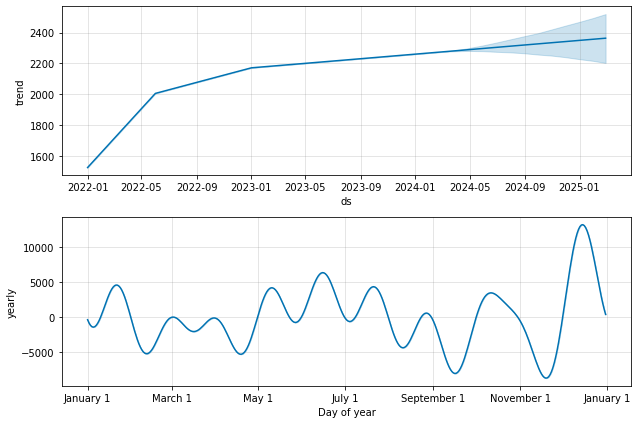

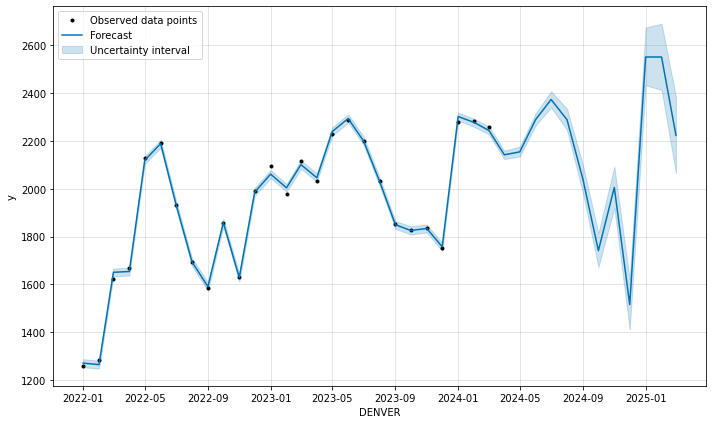

In [34]:
fcst1 = model_denver.predict(future)
fig1 = model_denver.plot_components(fcst1)


#plots observed + forecasted data
fig2 = model_denver.plot(fcst1, 
                  include_legend='TRUE',
                  plot_cap='TRUE',
                   xlabel=  "DENVER")


C:\Users\Jack.Barish\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Jack.Barish\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\Jack.Barish\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python date

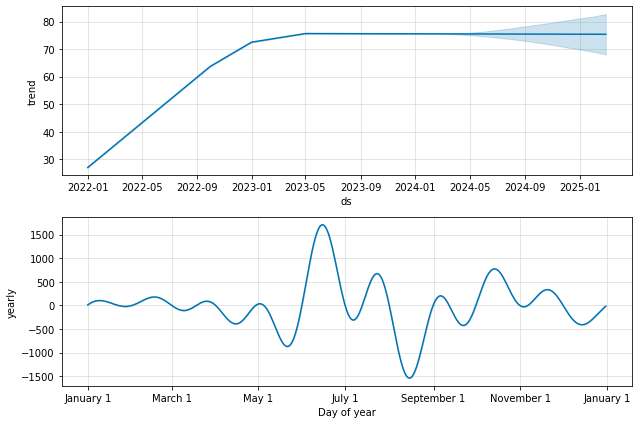

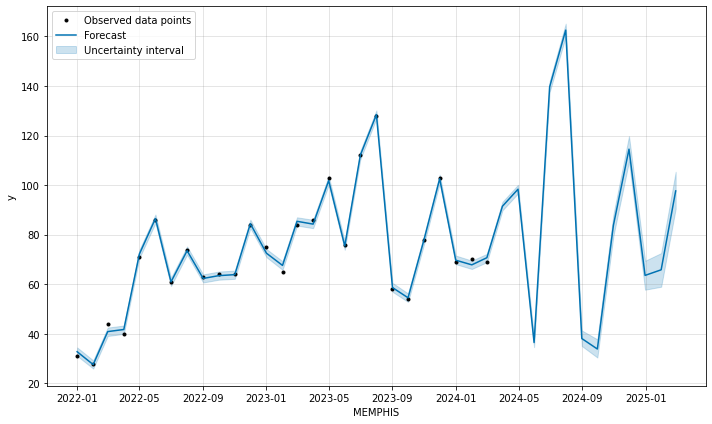

In [35]:
fcst2 = model_memphis.predict(future)
fig2 = model_memphis.plot_components(fcst2)


#plots observed + forecasted data
fig3 = model_memphis.plot(fcst2, 
                  include_legend='TRUE',
                  plot_cap='TRUE',
                   xlabel=  "MEMPHIS")


C:\Users\Jack.Barish\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Jack.Barish\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\Jack.Barish\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python date

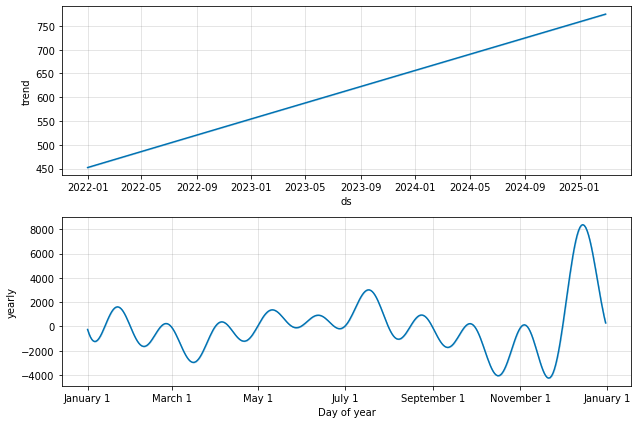

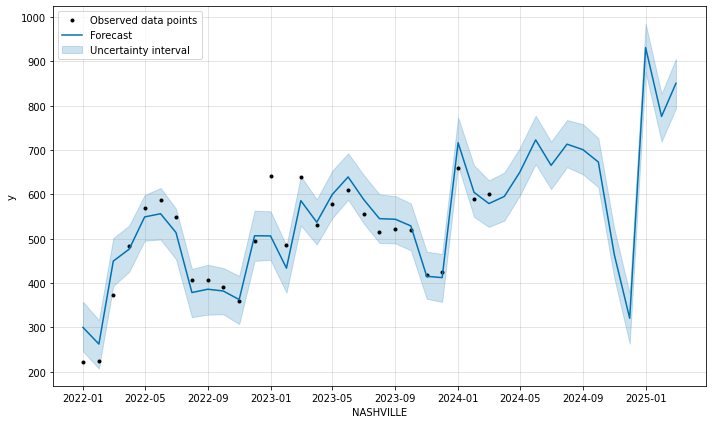

In [36]:
fcst3 = model_nashville.predict(future)
fig3 = model_nashville.plot_components(fcst3)


#plots observed + forecasted data
fig4 = model_nashville.plot(fcst3, 
                  include_legend='TRUE',
                  plot_cap='TRUE',
                   xlabel=  "NASHVILLE")

C:\Users\Jack.Barish\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Jack.Barish\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\Jack.Barish\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python date

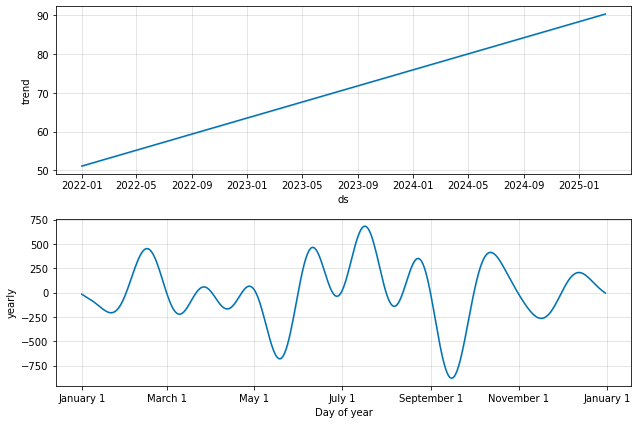

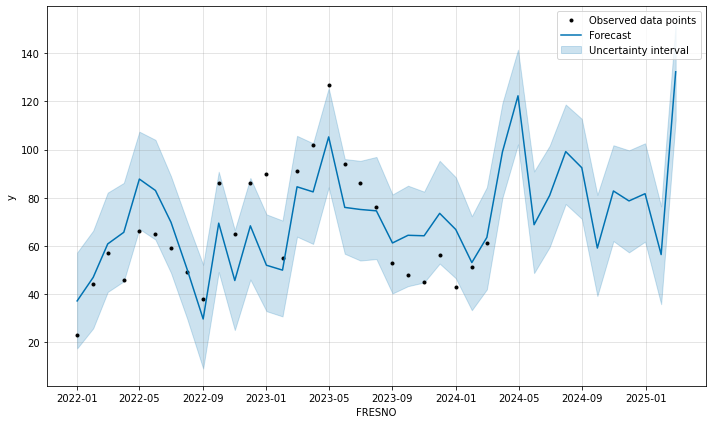

In [37]:
fcst4 = model_fresno.predict(future)
fig4 = model_fresno.plot_components(fcst4)


#plots observed + forecasted data
fig5 = model_fresno.plot(fcst4, 
                  include_legend='TRUE',
                  plot_cap='TRUE',
                   xlabel=  "FRESNO" )

C:\Users\Jack.Barish\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Jack.Barish\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\Jack.Barish\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python date

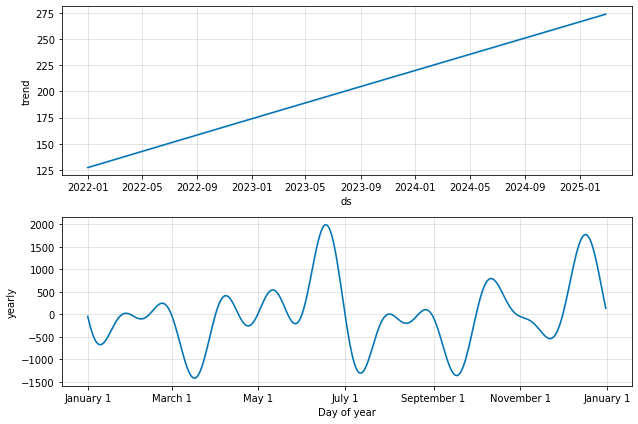

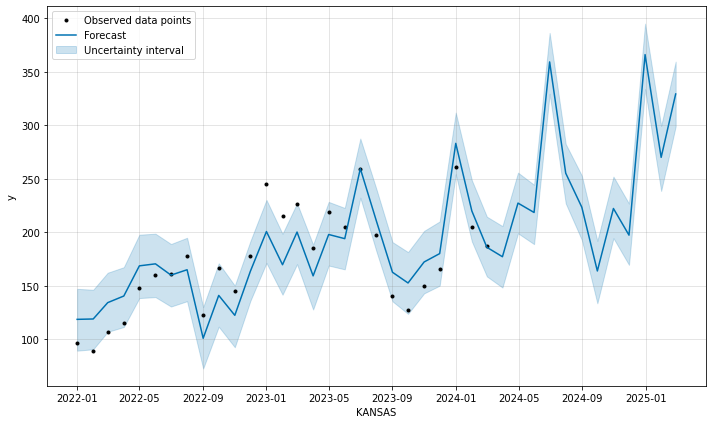

In [38]:
fcst5 = model_kansas.predict(future)
fig5 = model_kansas.plot_components(fcst5)


#plots observed + forecasted data
fig6 = model_kansas.plot(fcst5, 
                  include_legend='TRUE',
                  plot_cap='TRUE',
                   xlabel=  "KANSAS" )

C:\Users\Jack.Barish\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Jack.Barish\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\Jack.Barish\AppData\Roaming\Python\Python39\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python date

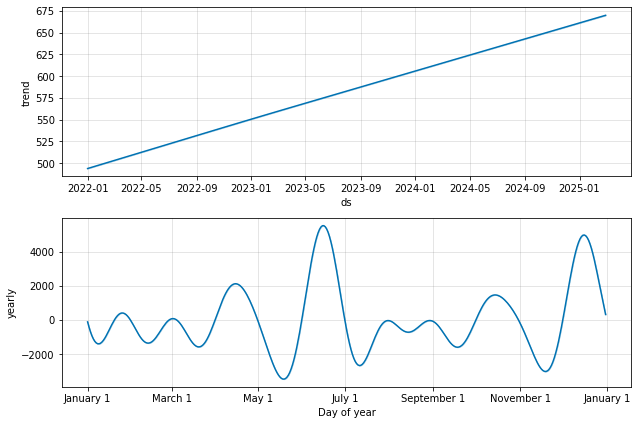

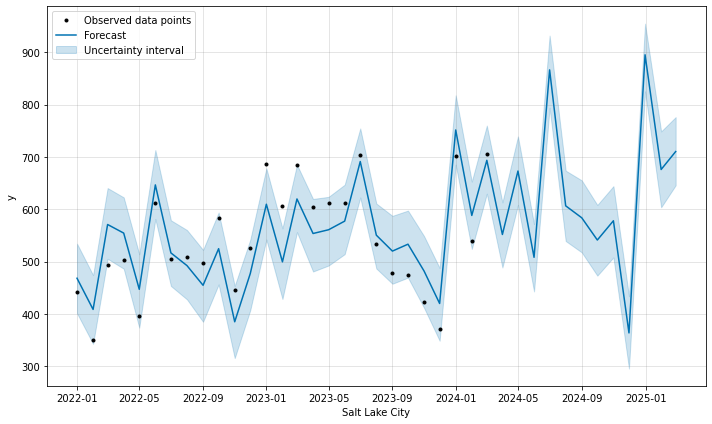

In [39]:


fcst6 = model_salt.predict(future)
fig6 = model_salt.plot_components(fcst6)


#plots observed + forecasted data
fig7 = model_salt.plot(fcst6, 
                  include_legend='TRUE',
                  plot_cap='TRUE',
                   xlabel=  "Salt Lake City" )





